In [211]:
# import necessary module
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# read file content
summary = {}
with open("summary.txt", "r") as file:
    for line in file:
        line_arr = line.rstrip().split("==>")
        summary[line_arr[0]] = eval(line_arr[1])

# Length of the sequences in histogram

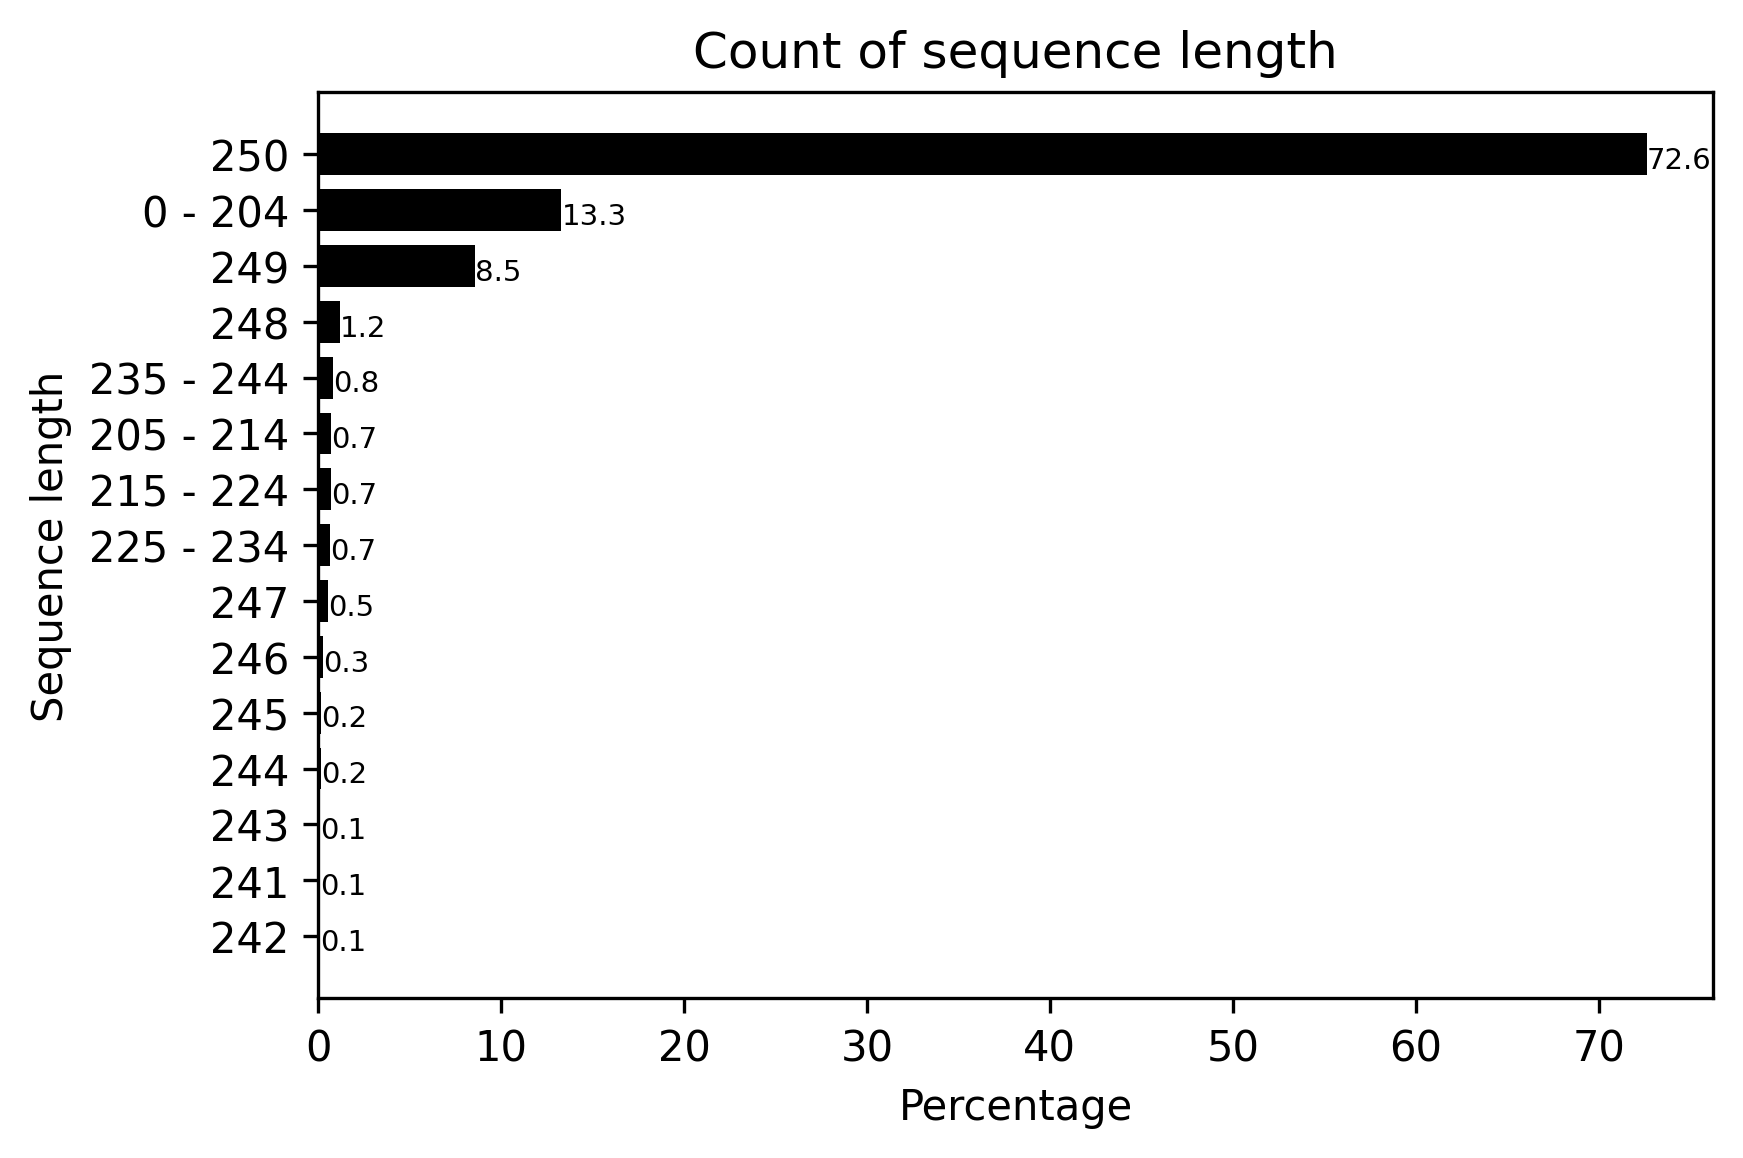

In [212]:
# Importing file
with open("length_counter.pkl", "rb") as file:
    count_histogram = pickle.load(file)
# count histogram have two options raw count and in percentage
count_histogram_percentage = count_histogram["percentage"]
fig, ax = plt.subplots(dpi=300)

x = list(count_histogram_percentage.keys())
y = list(count_histogram_percentage.values())
ax.barh(x, y, .75, color='black')
for i, v in enumerate(y):
    ax.text(v, i-.25, str(round(v,1)), color='black', fontsize=7)
ax.set_xlabel("Percentage")
ax.set_ylabel("Sequence length")
ax.set_title("Count of sequence length")
plt.show()

# Unique sequences

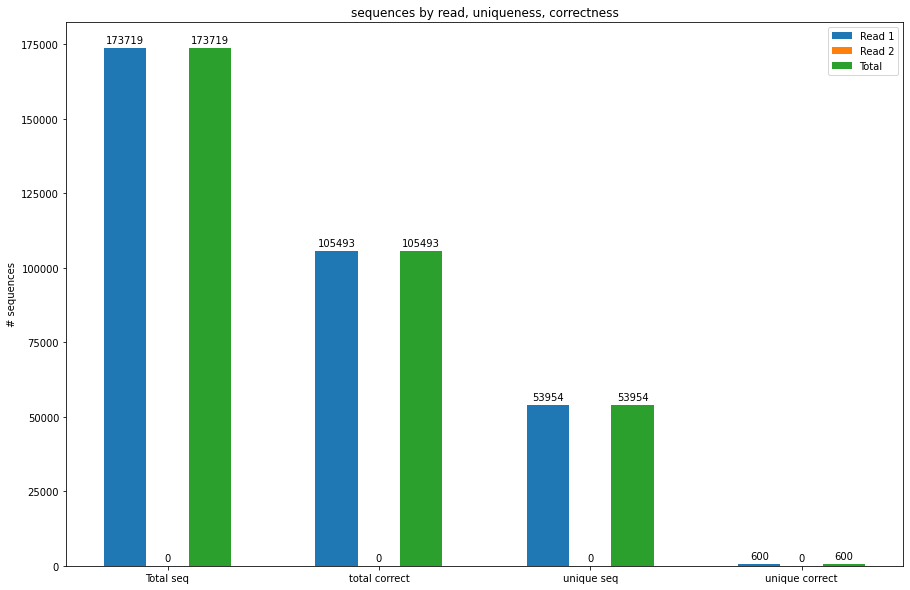

In [213]:
read_1 = {
    'Total seq':  summary['r1 total sequences'],
    'total correct': summary['r1 total correct'],
    'unique seq': summary['r1 total unique'],
    'unique correct': summary['r1 unique correct']
}
read_2 = {
    'Total seq':  summary['r2 total sequences'],
    'total correct': summary['r2 total correct'],
    'unique seq': summary['r2 total unique'],
    'unique correct': summary['r2 unique correct']
}
total = {
    'Total seq':  summary['r2 total sequences'] + summary['r1 total sequences'],
    'total correct': summary['total  correct'],
    'unique seq': summary['total unique'],
    'unique correct': summary['total unique correct']
}
labels = list(read_1.keys())
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width, read_1.values(), width, label='Read 1')
read_2 = ax.bar(x, read_2.values(), width, label='Read 2')
total = ax.bar(x + width, total.values(), width, label='Total')
ax.set_ylabel('# sequences')
ax.set_title('sequences by read, uniqueness, correctness')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(read_1)
autolabel(read_2)
autolabel(total)

# Sequence correctness

## Correctness on Total sequences

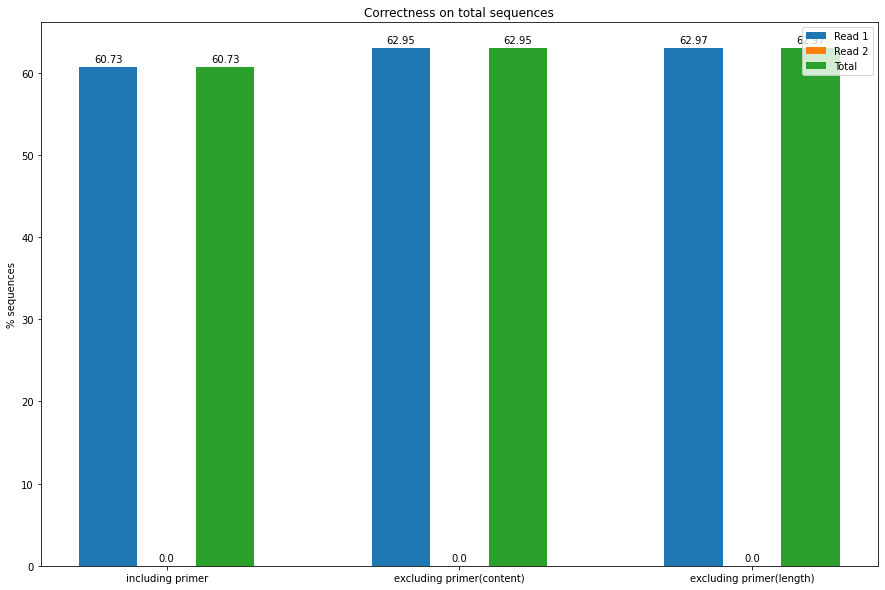

In [214]:
total = {
    'including primer': round(summary['total  correct'] * 100 / summary['total sequence'], 2),
    'excluding primer(content)': round(summary['total correct(excluding primer based on content)'] * 100 / summary['total sequence'], 2),
    'excluding primer(length)': round(summary['total  correct sequences in both reads(excluding primer based on length)'] * 100 / summary['total sequence'], 2)
}
read_1 = {
    'including primer': round(summary['r1 total correct'] * 100 / summary['r1 total sequences'], 2),
    'excluding primer(content)': round(summary['r1 total correct(excluding primer based on content)'] * 100 / summary['r1 total sequences'], 2),
    'excluding primer(length)': round(summary['r1 total correct(excluding primer based on length)'] * 100 / summary['r1 total sequences'], 2)
}
summary['r2 total sequences'] = 1
read_2 = {
    'including primer': round(summary['r2 total correct'] * 100 / summary['r2 total sequences'], 2),
    'excluding primer(content)': round(summary['r2 total correct(excluding primer based on content)'] * 100 / summary['r2 total sequences'], 2),
    'excluding primer(length)': round(summary['r2 total correct(excluding primer based on length)'] * 100 / summary['r2 total sequences'], 2)
}

labels = list(read_1.keys())
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width, read_1.values(), width, label='Read 1')
read_2 = ax.bar(x, read_2.values(), width, label='Read 2')
total = ax.bar(x + width, total.values(), width, label='Total')
ax.set_ylabel('% sequences')
ax.set_title('Correctness on total sequences')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
autolabel(read_1)
autolabel(read_2)
autolabel(total)

## Correctness on unique sequences

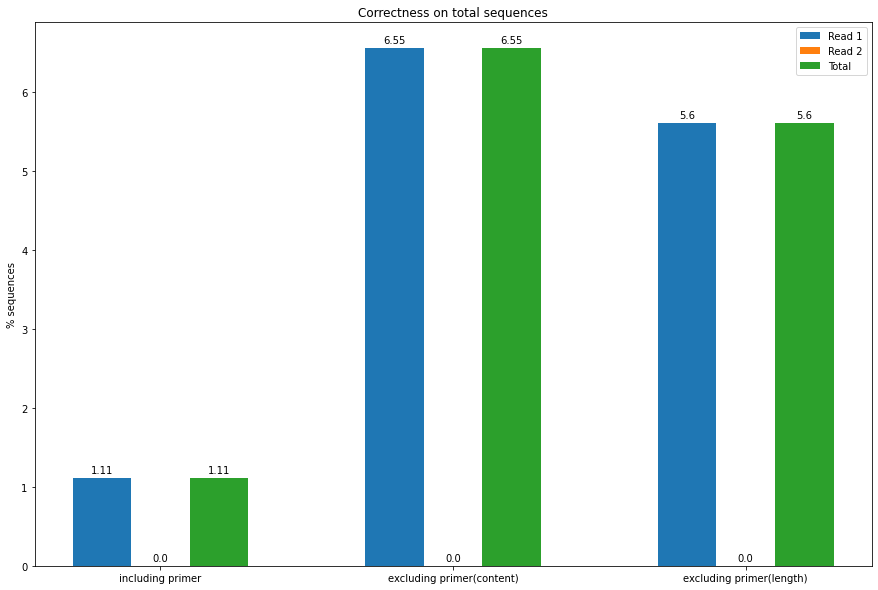

In [215]:
total = {
    'including primer': round(summary['total unique correct'] * 100 / summary['total unique'], 2),
    'excluding primer(content)': round(summary['total unique correct(excluding primer based on content)'] * 100 / summary['total unique'], 2),
    'excluding primer(length)': round(summary['total unique correct sequences in both reads(excluding primer based on length)'] * 100 / summary['total unique'], 2)
}
read_1 = {
    'including primer': round(summary['r1 unique correct'] * 100 / summary['r1 total unique'], 2),
    'excluding primer(content)': round(summary['r1 unique correct(excluding primer based on content)'] * 100 / summary['r1 total unique'], 2),
    'excluding primer(length)': round(summary['r1 unique correct(excluding primer based on length)'] * 100 / summary['r1 total unique'], 2)
}
summary['r2 total unique'] = 1
read_2 = {
    'including primer': round(summary['r2 unique correct'] * 100 / summary['r2 total unique'], 2),
    'excluding primer(content)': round(summary['r2 unique correct(excluding primer based on content)'] * 100 / summary['r2 total unique'], 2),
    'excluding primer(length)': round(summary['r2 unique correct(excluding primer based on content)'] * 100 / summary['r2 total unique'], 2)
}

labels = list(read_1.keys())
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width, read_1.values(), width, label='Read 1')
read_2 = ax.bar(x, read_2.values(), width, label='Read 2')
total = ax.bar(x + width, total.values(), width, label='Total')
ax.set_ylabel('% sequences')
ax.set_title('Correctness on total sequences')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
autolabel(read_1)
autolabel(read_2)
autolabel(total)

# Error distribution

## Error distribution on unique sequences

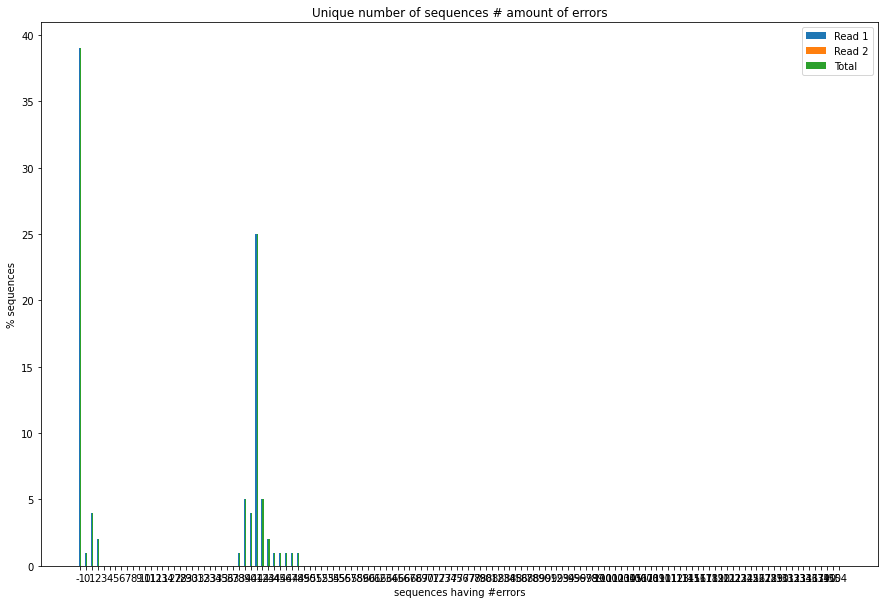

In [217]:
total = {k: round(v / summary['total unique'], 2) * 100 for k, v in summary['unique error distribution'].items()}
read_1 = {k: round(v / summary['r1 total unique'], 2) * 100 for k, v in summary['r1_unique_err_distribution'].items()}
read_2 = {k: round(v / summary['r2 total unique'], 2) * 100 for k, v in summary['r2_unique_err_distribution'].items()}

#values
labels = sorted(list(read_1.keys()))
total_values = [total.get(label,0) for label in labels]
read1_values = [read_1.get(label,0) for label in labels]
read2_values = [read_2.get(label,0) for label in labels]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width/2, read1_values, width, label='Read 1')
read_2 = ax.bar(x, read2_values, width, label='Read 2')
total = ax.bar(x + width/2, total_values, width, label='Total')
ax.set_ylabel('% sequences')
ax.set_xlabel("sequences having #errors")
ax.set_title('Unique number of sequences # amount of errors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
#autolabel(read_1)
#autolabel(read_2)
#autolabel(total)

## Error distribution on total sequences

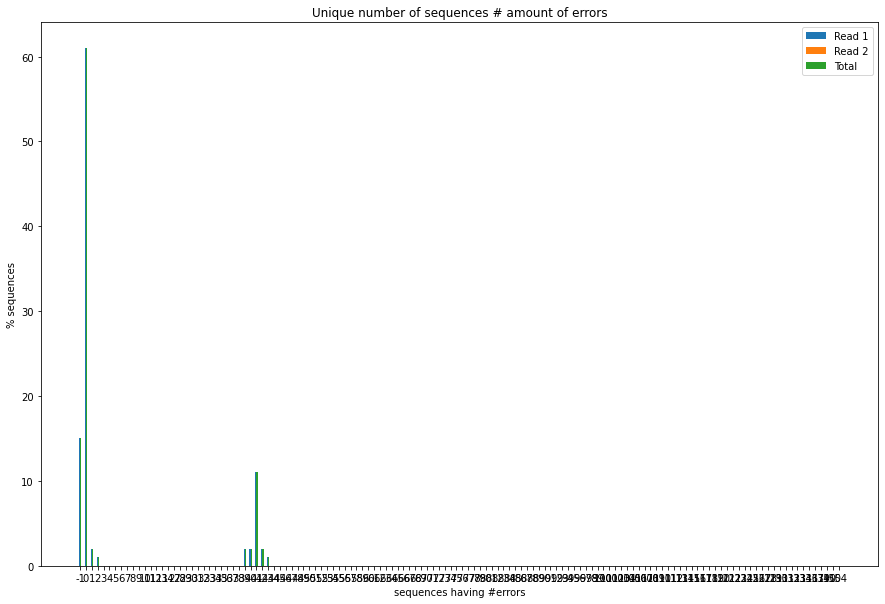

In [218]:
total = {k: round(v / summary['total sequence'], 2) * 100 for k, v in summary['total_error_distribution'].items()}
read_1 = {k: round(v / summary['r1 total sequences'], 2) * 100 for k, v in summary['r1_total_err_distribution'].items()}
read_2 = {k: round(v / summary['r2 total sequences'], 2) * 100 for k, v in summary['r2_total_err_distribution'].items()}

#values
labels = sorted(list(read_1.keys()))
total_values = [total.get(label,0) for label in labels]
read1_values = [read_1.get(label,0) for label in labels]
read2_values = [read_2.get(label,0) for label in labels]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width/2, read1_values, width, label='Read 1')
read_2 = ax.bar(x, read2_values, width, label='Read 2')
total = ax.bar(x + width/2, total_values, width, label='Total')
ax.set_ylabel('% sequences')
ax.set_xlabel("sequences having #errors")
ax.set_title('Unique number of sequences # amount of errors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Correctness on primer only

## Primer correctness on unique sequences

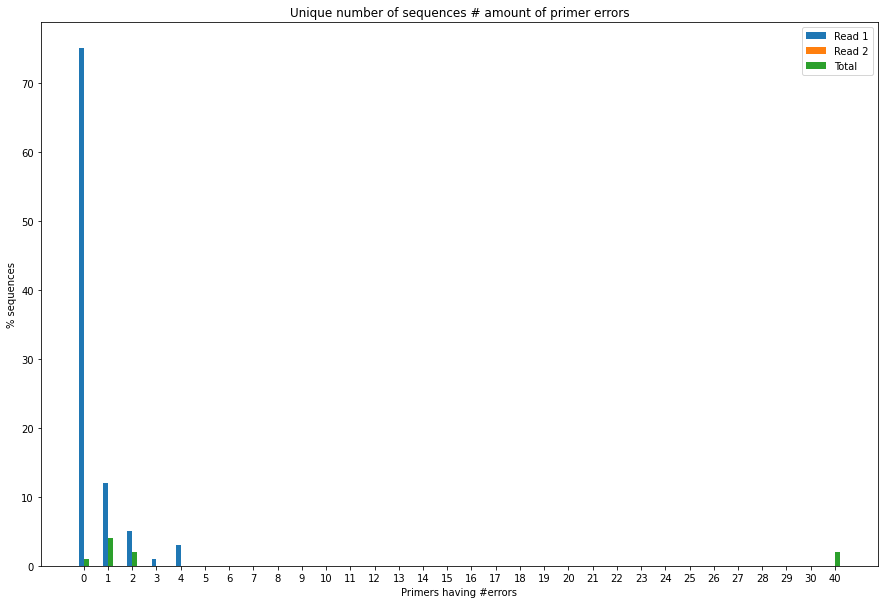

In [219]:
total = {k: round(v / summary['total unique'], 2) * 100 for k, v in summary['unique_primer_error_distribution'].items()}
read_1 = {k: round(v / summary['r1 total unique'], 2) * 100 for k, v in summary['r1_unique_primer_err_distribution'].items()}
read_2 = {k: round(v / summary['r2 total unique'], 2) * 100 for k, v in summary['r2_unique_primer_err_distribution'].items()}

#values
labels = sorted(list(read_1.keys()))
total_values = [total.get(label,0) for label in labels]
read1_values = [read_1.get(label,0) for label in labels]
read2_values = [read_2.get(label,0) for label in labels]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width/2, read1_values, width, label='Read 1')
read_2 = ax.bar(x, read2_values, width, label='Read 2')
total = ax.bar(x + width/2, total_values, width, label='Total')
ax.set_ylabel('% sequences')
ax.set_xlabel("Primers having #errors")
ax.set_title('Unique number of sequences # amount of primer errors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

## Primer sequences on all sequences

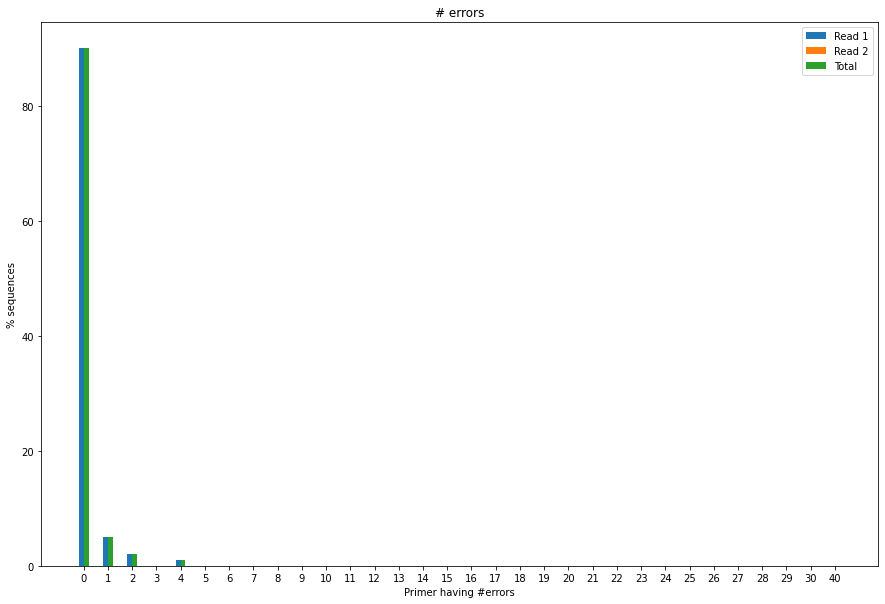

In [220]:
total = {k: round(v / summary['total sequence'], 2) * 100 for k, v in summary['total_primer_error_distribution'].items()}
read_1 = {k: round(v / summary['r1 total sequences'], 2) * 100 for k, v in summary['r1_total_primer_err_distribution'].items()}
read_2 = {k: round(v / summary['r2 total sequences'], 2) * 100 for k, v in summary['r2_total_primer_err_distribution'].items()}

#values
labels = sorted(list(read_1.keys()))
total_values = [total.get(label,0) for label in labels]
read1_values = [read_1.get(label,0) for label in labels]
read2_values = [read_2.get(label,0) for label in labels]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
read_1 = ax.bar(x - width/2, read1_values, width, label='Read 1')
read_2 = ax.bar(x, read2_values, width, label='Read 2')
total = ax.bar(x + width/2, total_values, width, label='Total')
ax.set_ylabel('% sequences')
ax.set_xlabel("Primer having #errors")
ax.set_title('# errors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Number of times each sequences appeared

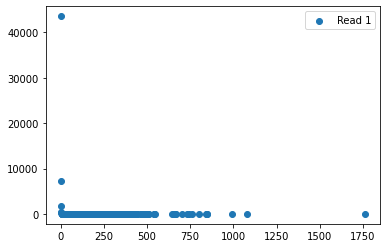

In [230]:
plt.scatter(summary['r1 sequence frequency'].keys(), summary['r1 sequence frequency'].values(), label="Read 1")
#plt.plot(summary['r2 sequence frequency'].keys(), summary['r2 sequence frequency'].values(), label="Read 2")
plt.legend()
plt.show()

## Ground truth frequency

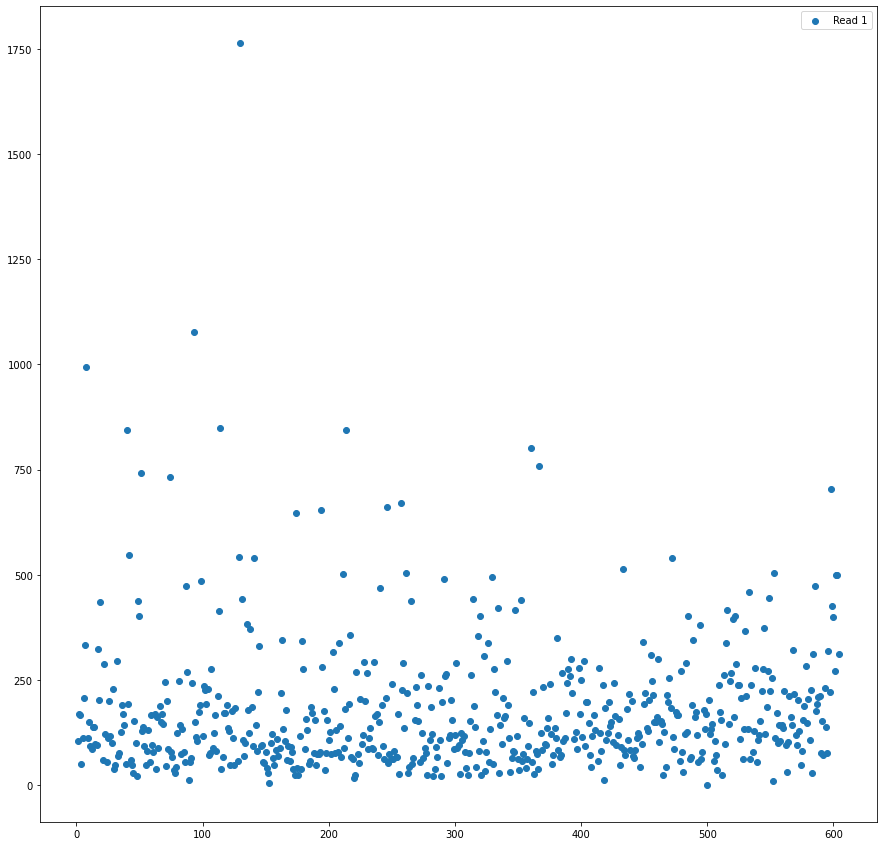

In [228]:
summary['r1_gt_frequency']
fig = plt.figure(figsize=(15, 15))
plt.scatter(summary['r1_gt_frequency'].keys(), summary['r1_gt_frequency'].values(), label="Read 1")
#plt.plot(summary['r2 sequence frequency'].keys(), summary['r2 sequence frequency'].values(), label="Read 2")
plt.legend()
plt.show()

In [229]:
summary

{'total unique': 53954,
 'r1 total unique': 53954,
 'r2 total unique': 1,
 'total unique correct': 600,
 'total  correct': 105493,
 'r1 unique correct': 600,
 'r2 unique correct': 0,
 'r1 total correct': 105493,
 'r2 total correct': 0,
 'total unique correct(excluding primer based on content)': 3532,
 'total correct(excluding primer based on content)': 109357,
 'r1 unique correct(excluding primer based on content)': 3532,
 'r2 unique correct(excluding primer based on content)': 0,
 'r1 total correct(excluding primer based on content)': 109357,
 'r2 total correct(excluding primer based on content)': 0,
 'total unique correct sequences in both reads(excluding primer based on length)': 3024,
 'total  correct sequences in both reads(excluding primer based on length)': 109385,
 'r1 unique correct(excluding primer based on length)': 3024,
 'r2 unique correct(excluding primer based on length)': 0,
 'r1 total correct(excluding primer based on length)': 109385,
 'r2 total correct(excluding prim